<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-unsupervised-learning/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Clustering**

---



In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
customer_df = pd.read_csv("Mall_Customers.csv")

In [41]:
customer_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Data Cleaning and Preparation**

---



In [42]:
# Print original column names
print("Original column names:")
print(customer_df.columns)

Original column names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [43]:
# Rename the columns for easier access
customer_df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

In [44]:
# Print new column names to confirm the change
print("\nNew column names:")
print(customer_df.columns)


New column names:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')


In [45]:
print("\nDataFrame with new column names:")
customer_df.head()


DataFrame with new column names:


,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **EDA & Visualization**

---



In [46]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
customer_df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Spending Score (1-100)')

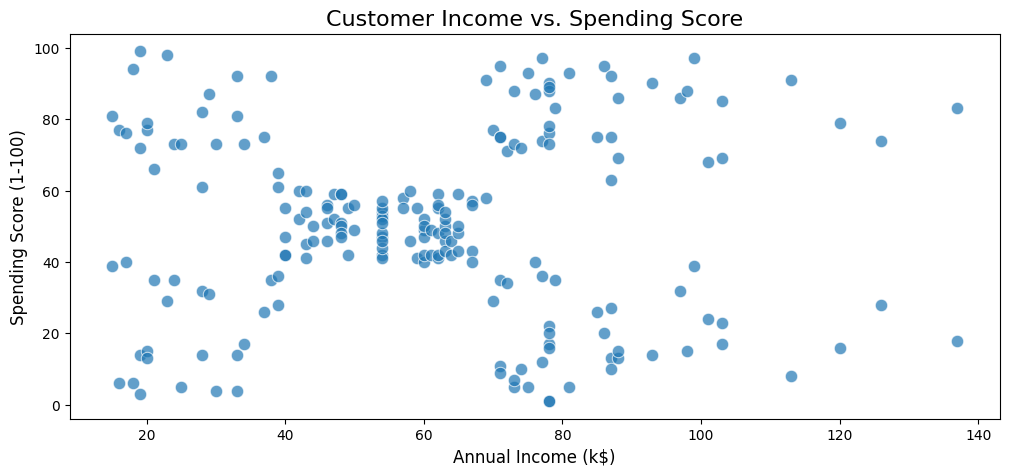

In [48]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=customer_df, x='Income', y='Spending_Score', s=80, alpha=0.7)

plt.title('Customer Income vs. Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

Text(0.5, 1.0, 'Distribution of Age')

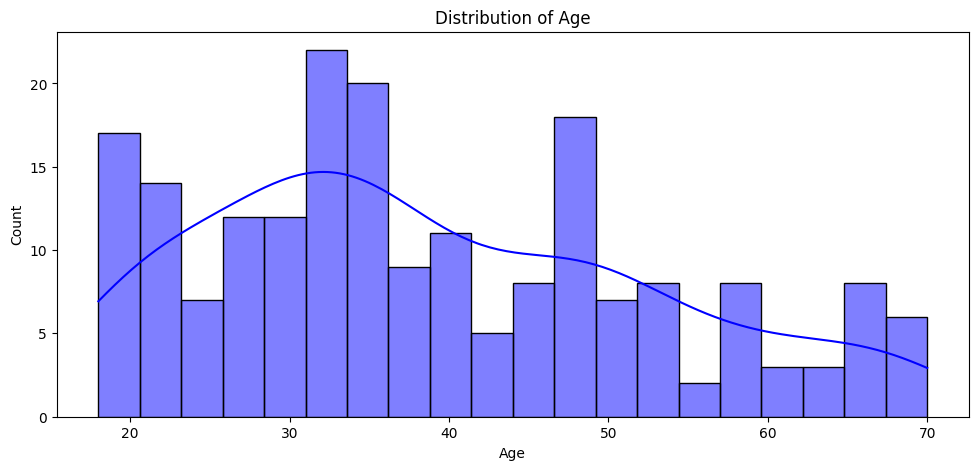

In [49]:
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 1)
sns.histplot(customer_df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual Income')

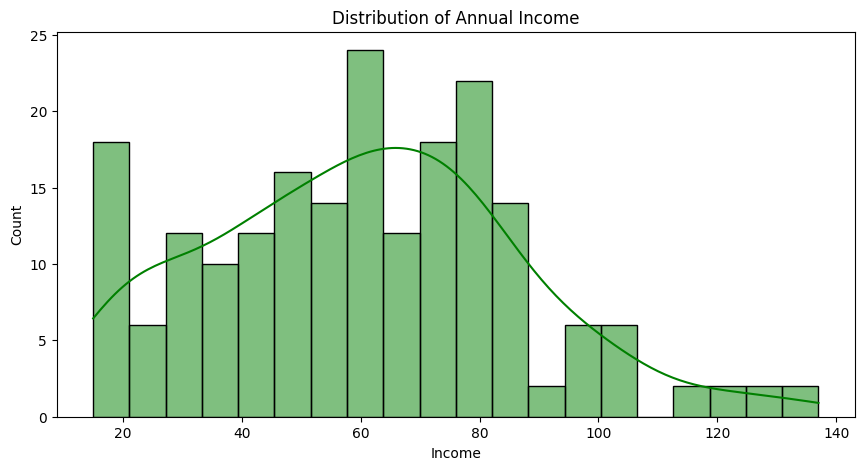

In [50]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 2)
sns.histplot(customer_df['Income'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income')

Text(0.5, 1.0, 'Distribution of Spending Score')

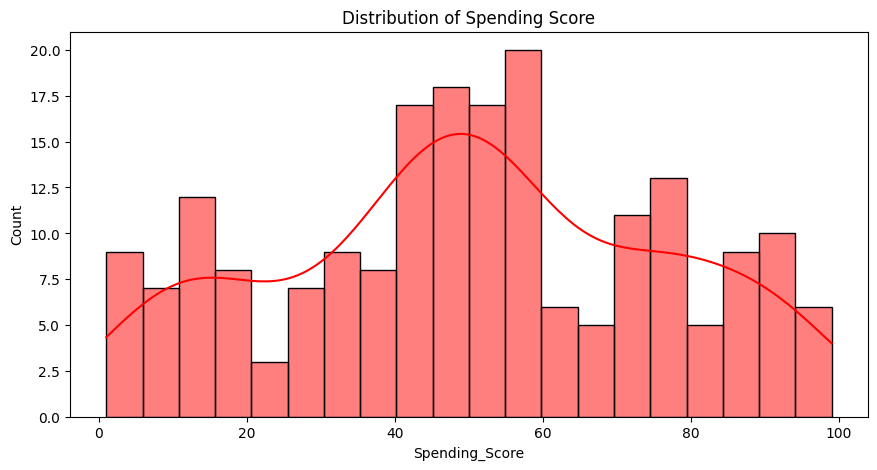

In [51]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 3)
sns.histplot(customer_df['Spending_Score'], bins=20, kde=True, color='red')
plt.title('Distribution of Spending Score')

Text(0, 0.5, 'Count')

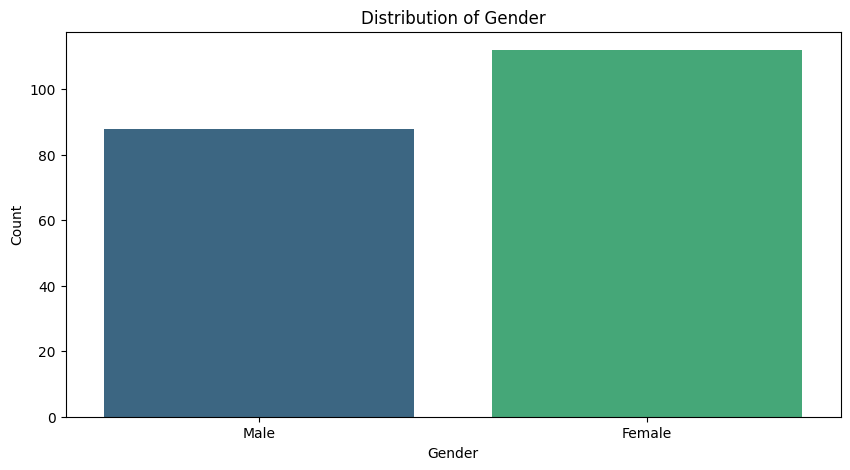

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_df, x='Gender', palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


--- Plotting All Pairwise Relationships ---


Text(0.5, 1.02, 'Pairwise Relationships of Numerical Features by Gender')

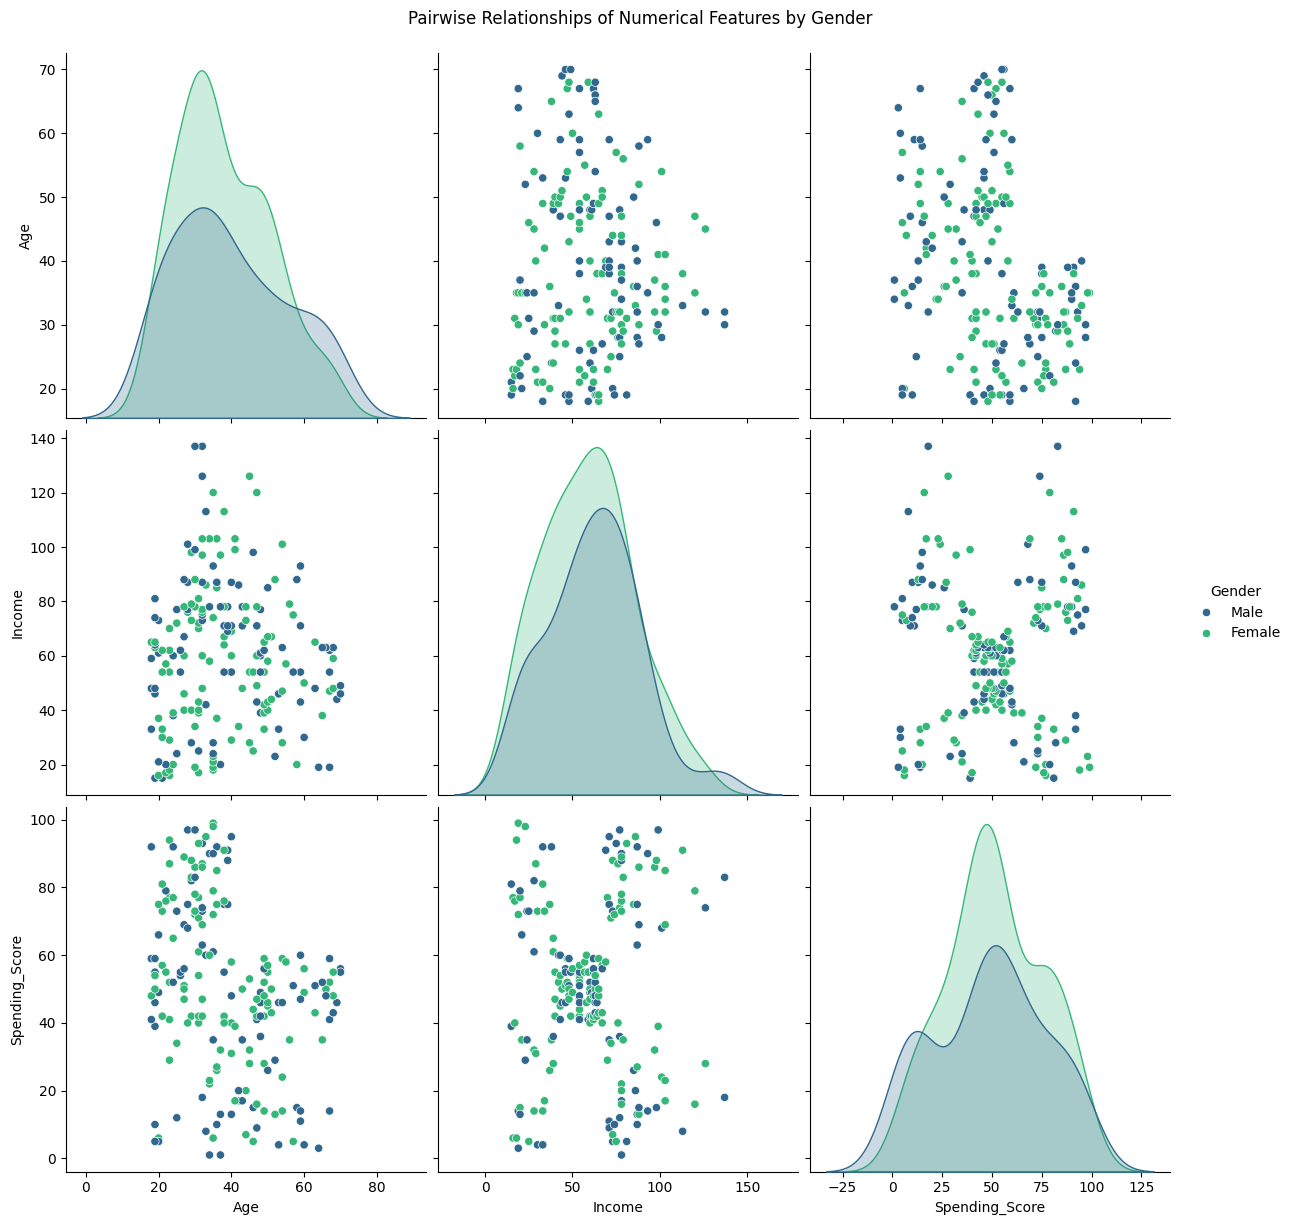

In [53]:
print("\n--- Plotting All Pairwise Relationships ---")

# We'll add 'hue="Gender"' to see if gender plays a role in the clusters
pairplot_fig = sns.pairplot(customer_df, vars=['Age', 'Income', 'Spending_Score'], hue='Gender', palette='viridis', height=4)
pairplot_fig.fig.suptitle('Pairwise Relationships of Numerical Features by Gender', y=1.02) # y=1.02 raises title

In [54]:
customer_df['Gender_Numerical'] = customer_df['Gender'].map({'Male': 0, 'Female': 1})

print("--- Converted 'Gender' to a new numerical column ---")
print(customer_df[['Gender', 'Gender_Numerical']].head())

--- Converted 'Gender' to a new numerical column ---
   Gender  Gender_Numerical
0    Male                 0
1    Male                 0
2  Female                 1
3  Female                 1
4  Female                 1


In [55]:
customer_df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Gender_Numerical
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# **Feature Selection and Scaling**

---



In [56]:
X = customer_df[['Gender_Numerical', 'Income', 'Spending_Score']]

print("\n--- Selected Features for Clustering ---")
print(X.head())


--- Selected Features for Clustering ---
   Gender_Numerical  Income  Spending_Score
0                 0      15              39
1                 0      15              81
2                 1      16               6
3                 1      16              77
4                 1      17              40


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Define which columns to scale and which to pass through

columns_to_scale = ['Income', 'Spending_Score']
columns_to_passthrough = ['Gender_Numerical']

# 2. Create the ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_passthrough)
    ],
    remainder='drop' # This ensures no other columns accidentally get included
)

# 3. Apply the preprocessor to our data X
# We use .fit_transform() just like before, but on the preprocessor object.
X_scaled = preprocessor.fit_transform(X)

# 4. Inspect the result
# The output is a NumPy array. Let's look at the first 5 rows.
print("--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---")
print(X_scaled[:5])

# Note: The order of columns in the output array might be different.

scaled_feature_names = preprocessor.get_feature_names_out()

# Convert back to a DataFrame for clear inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_feature_names)

print("\n--- Correctly Scaled Data as a DataFrame (first 5 rows) ---")
X_scaled_df

--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---
[[-1.73899919 -0.43480148  0.        ]
 [-1.73899919  1.19570407  0.        ]
 [-1.70082976 -1.71591298  1.        ]
 [-1.70082976  1.04041783  1.        ]
 [-1.66266033 -0.39597992  1.        ]]

--- Correctly Scaled Data as a DataFrame (first 5 rows) ---


,scaler__Income,scaler__Spending_Score,passthrough__Gender_Numerical
0,-1.738999,-0.434801,0.0
1,-1.738999,1.195704,0.0
2,-1.700830,-1.715913,1.0
3,-1.700830,1.040418,1.0
4,-1.662660,-0.395980,1.0
...,...,...,...
195,2.268791,1.118061,1.0
196,2.497807,-0.861839,1.0
197,2.497807,0.923953,0.0
198,2.917671,-1.250054,0.0


# **Dendrogram Analysis to Determine Optimal k**

---



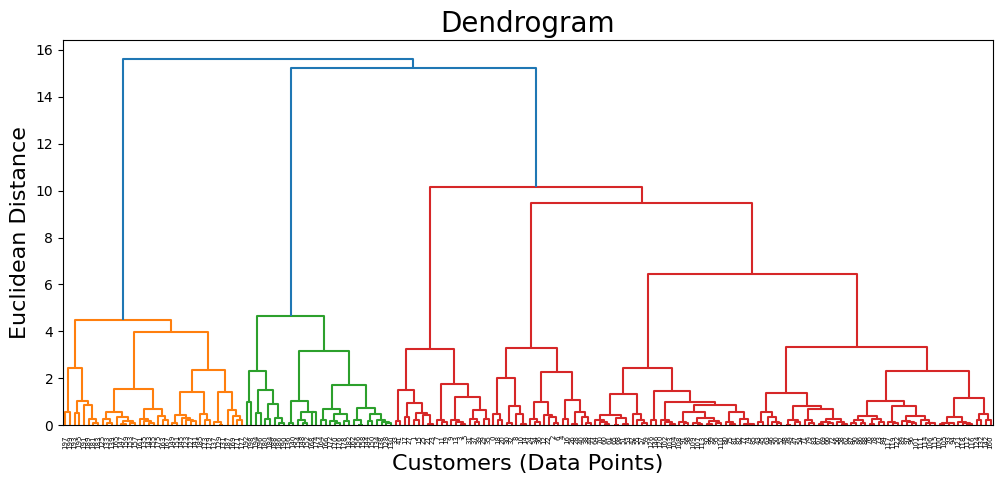

In [58]:
# We need to import the necessary function from SciPy
import scipy.cluster.hierarchy as sch

# Create the dendrogram
# We use the 'ward' linkage method, which is a common and effective choice.
# It tries to minimize the variance within each cluster being merged.
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers (Data Points)', fontsize=16)
plt.ylabel('Euclidean Distance', fontsize=16)
plt.show()

# **Hierarchical Model Training and Visualization**

---



--- First 5 Rows with Hierarchical Cluster Assignments ---


,CustomerID,Gender,Age,Income,Spending_Score,Gender_Numerical,Hierarchical_Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


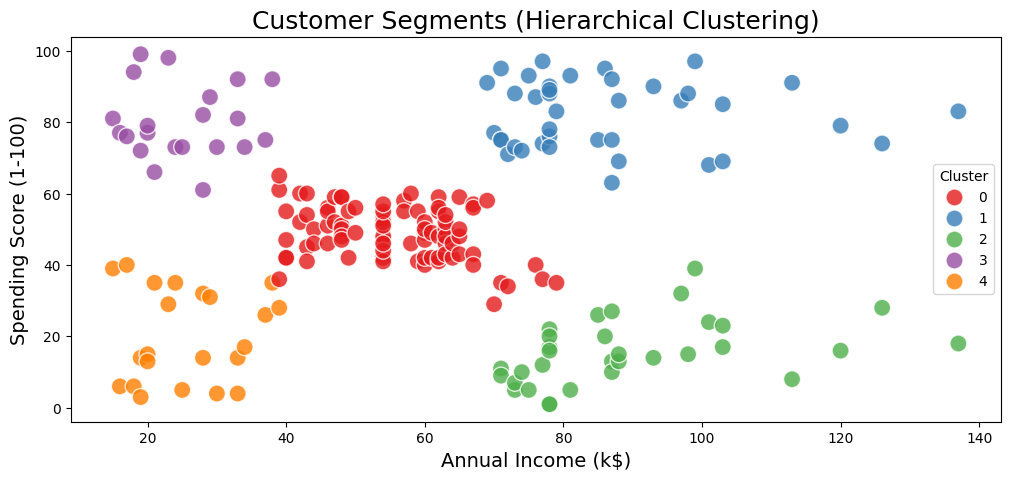

In [59]:
# 1. Model Training
# We import the AgglomerativeClustering class from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# We create an instance of the model with our chosen number of clusters.
# 'affinity' is the distance metric, 'euclidean' is the standard.
# 'linkage' is the same 'ward' method we used for the dendrogram.
hierarchical_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# We use .fit_predict() to train the model and get the cluster labels in one step.
cluster_labels = hierarchical_model.fit_predict(X_scaled)

# 2. Add the Cluster Labels back to our original DataFrame

customer_df['Hierarchical_Cluster'] = cluster_labels

print("--- First 5 Rows with Hierarchical Cluster Assignments ---")
display(customer_df.head())


# 3. Visualization of the Clusters

plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=customer_df,
    x='Income',
    y='Spending_Score',
    hue='Hierarchical_Cluster',
    palette='Set1',
    s=150,
    alpha=0.8
)

plt.title('Customer Segments (Hierarchical Clustering)', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster')

# **Cluster Profiling and Interpretation**

---



In [60]:
# --- 7. Cluster Profiling and Interpretation ---

# We group the DataFrame by the 'Hierarchical_Cluster' column and calculate the mean for each feature.
hierarchical_profile = customer_df.groupby('Hierarchical_Cluster')[['Age', 'Income', 'Spending_Score']].mean()

# Add the size of each cluster to our profile.
hierarchical_profile['Customer_Count'] = customer_df['Hierarchical_Cluster'].value_counts()

# Sort the profile by Income to make it easy to compare with our previous results.
hierarchical_profile = hierarchical_profile.sort_values(by='Income', ascending=False)

print("--- Customer Segment Profiles (Hierarchical Clustering) ---")
display(hierarchical_profile)

# For easy comparison, let's display the K-Means profile again (assuming you have it stored)
# If not, we can just compare from memory or by looking at the other notebook.
# print("\n--- For Reference: K-Means Profiles ---")
# display(kmeans_profile) # You would have to have this variable from the other notebook


--- Customer Segment Profiles (Hierarchical Clustering) ---


,Age,Income,Spending_Score,Customer_Count
Hierarchical_Cluster,,,,
2,41.000000,89.406250,15.593750,32
1,32.692308,86.538462,82.128205,39
0,42.546512,55.616279,48.976744,86
4,45.090909,25.727273,20.227273,22
3,25.333333,25.095238,80.047619,21


In [61]:
# --- Comparing Hierarchical vs. K-Means Profiles ---

print("--- Loading results from our K-Means notebook ---")

# Step 1: Load the saved K-Means results
try:
    kmeans_results_df = pd.read_csv('kmeans_results.csv')

    # Step 2: Merge these results back into our main customer_df
    # We need to make sure customer_df has the original CustomerID to merge on
    # Let's create a fresh copy to be safe
    comparison_df = pd.read_csv('Mall_Customers.csv')
    comparison_df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

    # Now merge the K-Means cluster labels into this DataFrame
    comparison_df = pd.merge(comparison_df, kmeans_results_df, on='CustomerID')

    # Step 3: Re-create the K-Means profile table
    kmeans_profile = comparison_df.groupby('Cluster')[['Age', 'Income', 'Spending_Score']].mean()
    kmeans_profile['Customer_Count'] = comparison_df['Cluster'].value_counts()
    kmeans_profile = kmeans_profile.sort_values(by='Income', ascending=False)

    print("✅ K-Means profile successfully recreated from file.")

    # Step 4: Display the two profiles together for comparison
    print("\n\n--- COMPARISON OF CLUSTER PROFILES ---")
    print("\n--- K-Means Clustering Profile ---")
    display(kmeans_profile)

    print("\n--- Hierarchical Clustering Profile ---")
    display(hierarchical_profile) # This is the variable we created in the previous cell

except FileNotFoundError:
    print("\n❌ Error: 'kmeans_results.csv' not found.")
    print("Please upload the results file from your first notebook to this Colab session.")

--- Loading results from our K-Means notebook ---
✅ K-Means profile successfully recreated from file.


--- COMPARISON OF CLUSTER PROFILES ---

--- K-Means Clustering Profile ---


,Age,Income,Spending_Score,Customer_Count
Cluster,,,,
4,41.114286,88.200000,17.114286,35
2,32.692308,86.538462,82.128205,39
1,42.716049,55.296296,49.518519,81
0,45.217391,26.304348,20.913043,23
3,25.272727,25.727273,79.363636,22



--- Hierarchical Clustering Profile ---


,Age,Income,Spending_Score,Customer_Count
Hierarchical_Cluster,,,,
2,41.000000,89.406250,15.593750,32
1,32.692308,86.538462,82.128205,39
0,42.546512,55.616279,48.976744,86
4,45.090909,25.727273,20.227273,22
3,25.333333,25.095238,80.047619,21


# **Saving Results**

---



In [62]:
# Select only the CustomerID and the new cluster labels
hierarchical_results = customer_df[['CustomerID', 'Hierarchical_Cluster']]

# Define the output filename
output_filename = 'hierarchical_results.csv'

# Save the results to a CSV file
hierarchical_results.to_csv(output_filename, index=False)

print(f"✅ Hierarchical clustering results have been saved to '{output_filename}'.")
print("This notebook is now complete.")

✅ Hierarchical clustering results have been saved to 'hierarchical_results.csv'.
This notebook is now complete.
